# Manifold Alignment via Stochastic Hoppoing (MASH) Demonstration

This demonstrates how to use the MASH class. Note, not everything discussed in the paper will be shown here. 

In [2]:
from mashspud.MASH import MASH

#We will require pandas for this demonstration
from demonstration_helper import *
import warnings

#Ignore the graphtools warnings. NOTE: You should probably remove this if you change the code, and so you can get the warnings. 
warnings.filterwarnings("ignore")

#Include a random state
rs = {"random_state" : 42} #NOTE: a random state of 42 would be initialized anyways, and so this isn't needed unless you change the value.

## Iris Dataset

In [3]:
#Prepare the dataset
iris_features, iris_labels = prepare_dataset("csv_files/iris.csv")

#Create domains
iris_domainA, iris_domainB = split_features(iris_features, split = "distort") #NOTE: Try changing split to "random" or "rotation"

#Create anchors. Use only 10 anchors. 
iris_anchors = create_anchors(int(len(iris_features)))[-10:] #NOTE: Try changing the 10 to any amount of anchors

# Initialize SPUD
iris_mashed = MASH(knn = 5, t =-1, verbose = 0, IDC = 1, DTM = 'log', page_rank = "None", density_normalization = False, distance_measure_A = "euclidean",
                    distance_measure_B = "euclidean", **rs) #NOTE: these are the default values. Try changing them!

#Fit SPUD
iris_mashed.fit(dataA = iris_domainA, dataB = iris_domainB, known_anchors=iris_anchors)

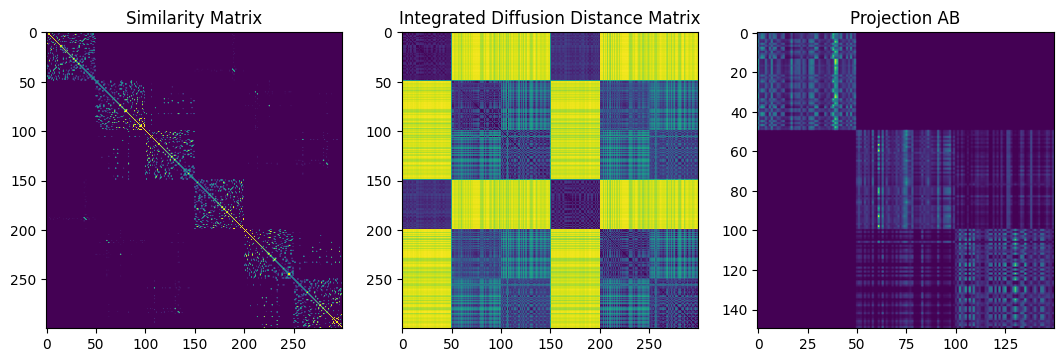

In [4]:
iris_mashed.plot_heat_maps()

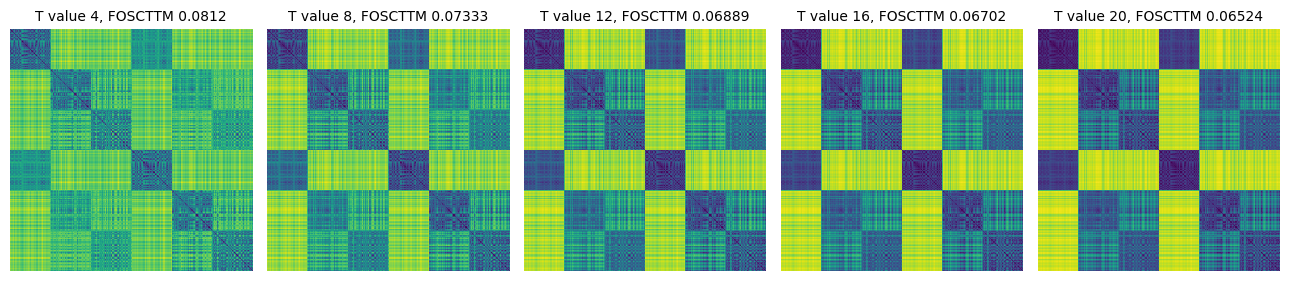

In [5]:
iris_mashed.plot_t_grid(rate = 4) #This function helps you find an ideal t value to use. 

Cross Embedding score: 0.9166666666666667
Fraction of Samples Closest to thier Match: 0.064
RF score trained on full Embedding: 0.9166666666666666


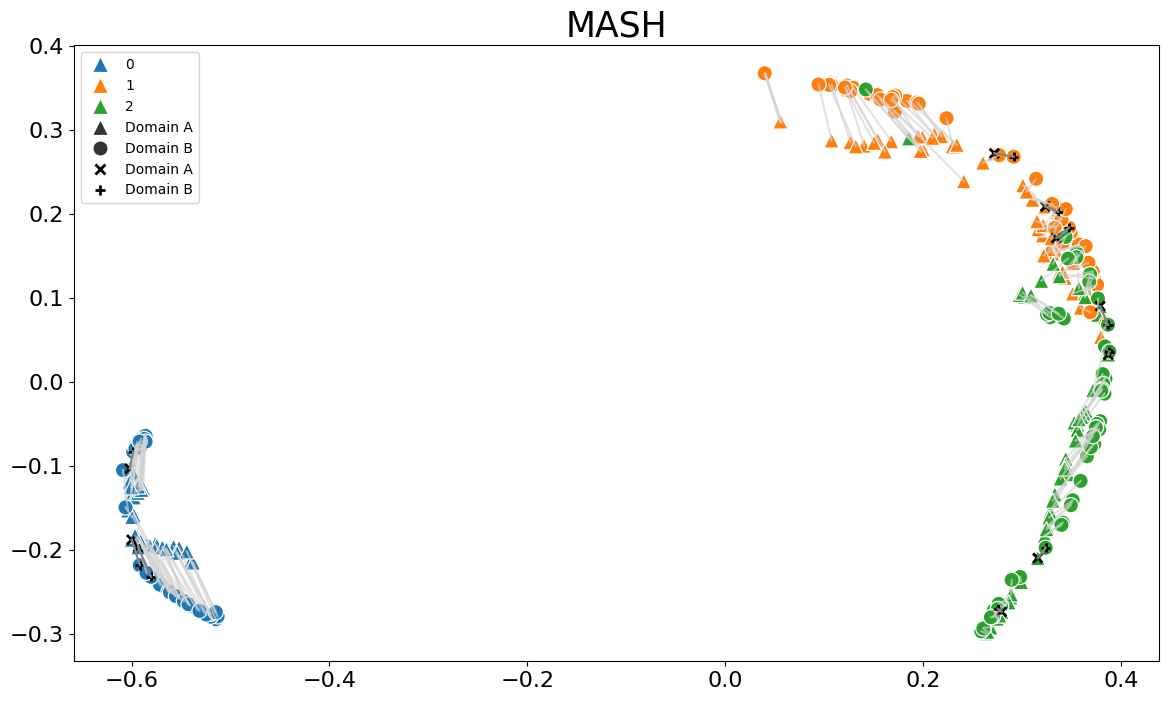

In [6]:
iris_mashed.plot_emb(labels = iris_labels)

How to interpret the above graph:
- The triangles are instances that come from Domain A, whereas the circles are instances that come from Domain B. 
- The light gray lines connect instances between domains that are the same (though distorted some how). The samller the line, the better i.e. leads to a lower (and better) FOSCTTM score.
- The black x or + means that the instance is an anchor, and thus was known knowledge for the algorithm to use. 
- The colors are different classes. We hope for their to be a natural class split. The better thr split, the higher the CE score. 

## Seeds Dataset


In [49]:
#Prepare the dataset
seeds_features, seeds_labels = prepare_dataset("csv_files/seeds.csv")

#Create domains
seeds_domainA, seeds_domainB = split_features(seeds_features, split = "rotation") #NOTE: Try changing split to "random" or "rotation"

#Create anchors. Use only 10 anchors. 
seeds_anchors = create_anchors(int(len(seeds_features)))[-20:] #NOTE: Try changing the to any amount of anchors

# Initialize SPUD
seeds_mashed = MASH(knn = 9, t=-1, verbose = 0, IDC = 1, DTM = 'kl', page_rank = "none", density_normalization = False, distance_measure_A = "cityblock",
                    distance_measure_B = "euclidean", chunk_size=10000, **rs)

#Fit SPUD
seeds_mashed.fit(dataA = seeds_domainA, dataB = seeds_domainB, known_anchors=seeds_anchors[:10])

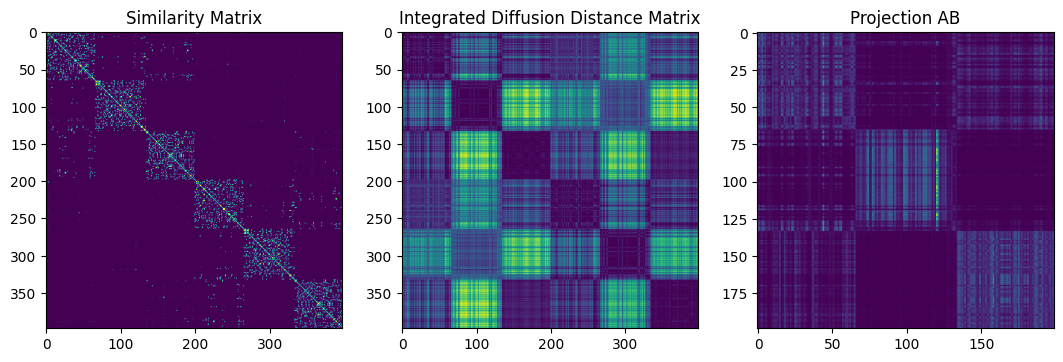

In [50]:
seeds_mashed.plot_heat_maps()

Cross Embedding score: 0.8517587939698492
Fraction of Samples Closest to thier Match: 0.15711724451402742
RF score trained on full Embedding: 0.9195979899497487


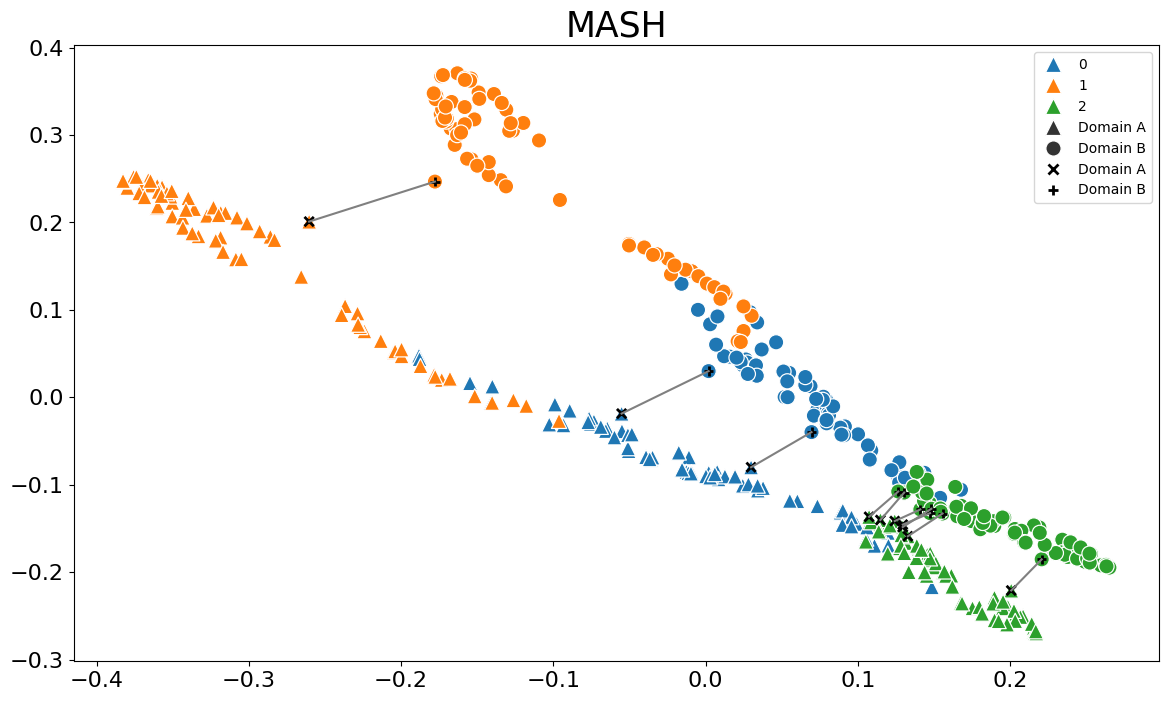

In [ ]:
seeds_mashed.plot_emb(labels = seeds_labels, show_lines=False) # We can see here in the center the domains seem to split apart in the blue area,and into the orange
#because fewer anchors are represented there.

In [ ]:
seeds_mashed.optimize_by_creating_connections(epochs= 3, threshold = "auto", connection_limit="auto", hold_out_anchors=seeds_anchors[-10:])
#False means that no new connections were found to be better 

False

In [11]:
FOSCTTM_score, CE_score, RF_score = seeds_mashed.get_scores(labels = seeds_labels) #NOTE: Notice the reduce in FOSCTTM scores
print(f"Cross Embedding score: {CE_score}")
print(f"Fraction of Samples Closest to thier Match: {FOSCTTM_score}")
print(f"RF-GAP score trained on the entire embedding {RF_score}")

Cross Embedding score: 0.8592964824120604
Fraction of Samples Closest to thier Match: 0.0721446428120502
RF-GAP score trained on the entire embedding 0.9120603015075377


## Breast Cancer Dataset

In [62]:
#Prepare the dataset
cancer_features, cancer_labels = prepare_dataset("csv_files/breast_cancer.csv")

#Create domains
cancer_domainA, cancer_domainB = split_features(cancer_features, split = "rotation") #NOTE: Try changing split to "random" or "rotation"

#Create anchors. 
cancer_anchors = create_anchors(int(len(cancer_features)))[:50] #NOTE: Try changing to any amount of anchors

# Initialize SPUD
cancer_mashed = MASH(knn = 7, t=10, verbose = 3, IDC = 1, DTM = 'log', page_rank = "None", density_normalization = False, distance_measure_A = "euclidean",
                    distance_measure_B = "euclidean", **rs)

#Fit SPUD
cancer_mashed.fit(dataA = cancer_domainA, dataB = cancer_domainB, known_anchors=cancer_anchors[:10])

Time Data Below
 Time it took to execute SGDM for domain A:  0.00654
 Time it took to execute the graph for domain A:  0.02821
 Time it took to execute SGDM for domain B:  0.00431
 Time it took to execute the graph for domain B:  0.02568
 Time it took to compute merge_graphs function:  0.27062
 Time it took to compute similarity_matrix function:  0.00717
 Time it took to compute diffusion process:  0.94657
Fit process finished. We recommend calling optimize_by_creating_connections.


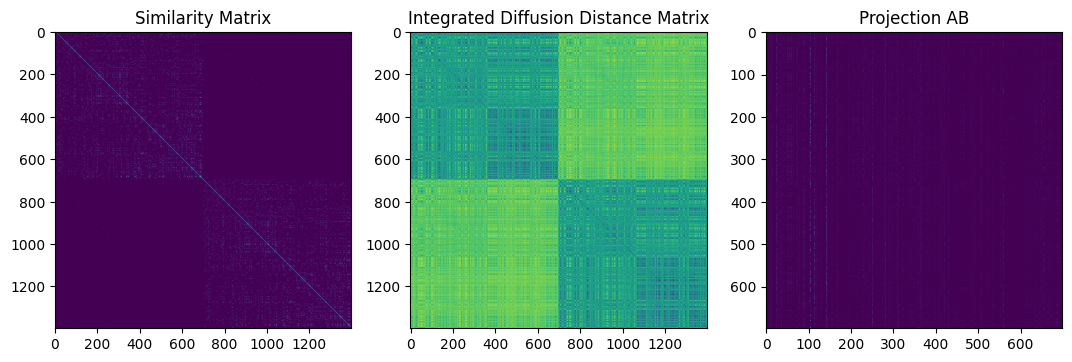

In [63]:
cancer_mashed.plot_heat_maps()

Time it took to calculate the embedding: 17.97523
RF-GAP score is accuracy
Calculating the classification Score.
Cross Embedding score: 0.9635193133047211
Fraction of Samples Closest to thier Match: 0.1957630049877098
RF score trained on full Embedding: 0.9742489270386266


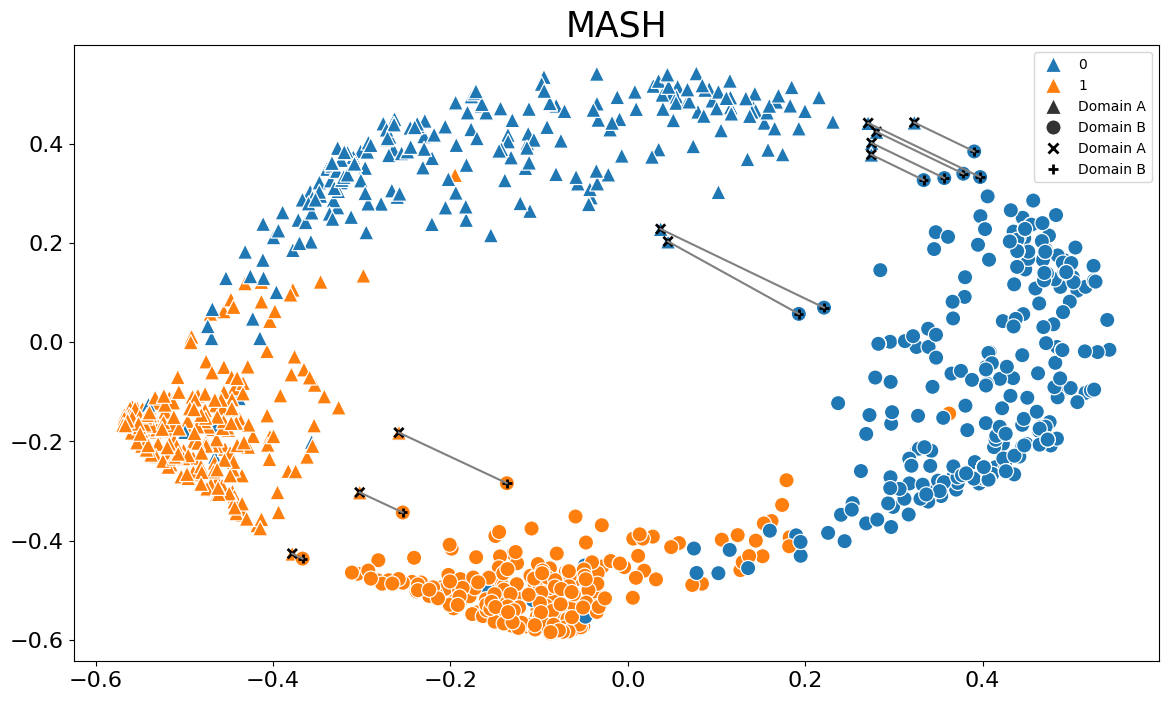

In [64]:
cancer_mashed.plot_emb(labels = cancer_labels, show_lines = False, show_pred = False)

## Glass Dataset

In [65]:
#Prepare the dataset
glass_features, glass_labels = prepare_dataset("csv_files/glass.csv")

#Create domains
glass_domainA, glass_domainB = split_features(glass_features, split = "rotation")

#Create anchors. Use only 10 anchors. 
glass_anchors = create_anchors(int(len(glass_features)))[:35] 

# Initialize SPUD
glass_mashed = MASH(knn = 3, t=-1, verbose = 3, IDC = 1, DTM = 'log', page_rank = "None", density_normalization = False, distance_measure_A = "euclidean",
                    distance_measure_B = "euclidean", **rs) #NOTE: Try changing the DTM to be hellinger!

#Fit SPUD
glass_mashed.fit(dataA = glass_domainA, dataB = glass_domainB, known_anchors=glass_anchors)

Time Data Below
 Time it took to execute SGDM for domain A:  0.00121
 Time it took to execute the graph for domain A:  0.00508
 Time it took to execute SGDM for domain B:  0.00064
 Time it took to execute the graph for domain B:  0.00462
 Time it took to compute merge_graphs function:  0.04431
 Time it took to compute similarity_matrix function:  0.00079
Using optimal t value of 33
 Time it took to compute diffusion process:  0.15982
Fit process finished. We recommend calling optimize_by_creating_connections.


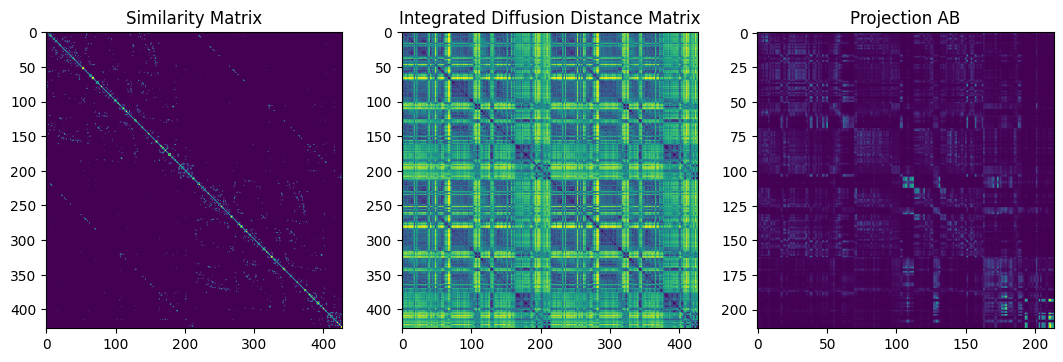

In [66]:
glass_mashed.plot_heat_maps()

Time it took to calculate the embedding: 1.75969
RF-GAP score is accuracy
Calculating the classification Score.
Cross Embedding score: 0.7570093457943925
Fraction of Samples Closest to thier Match: 0.004105162022884094
RF score trained on full Embedding: 0.9602803738317757


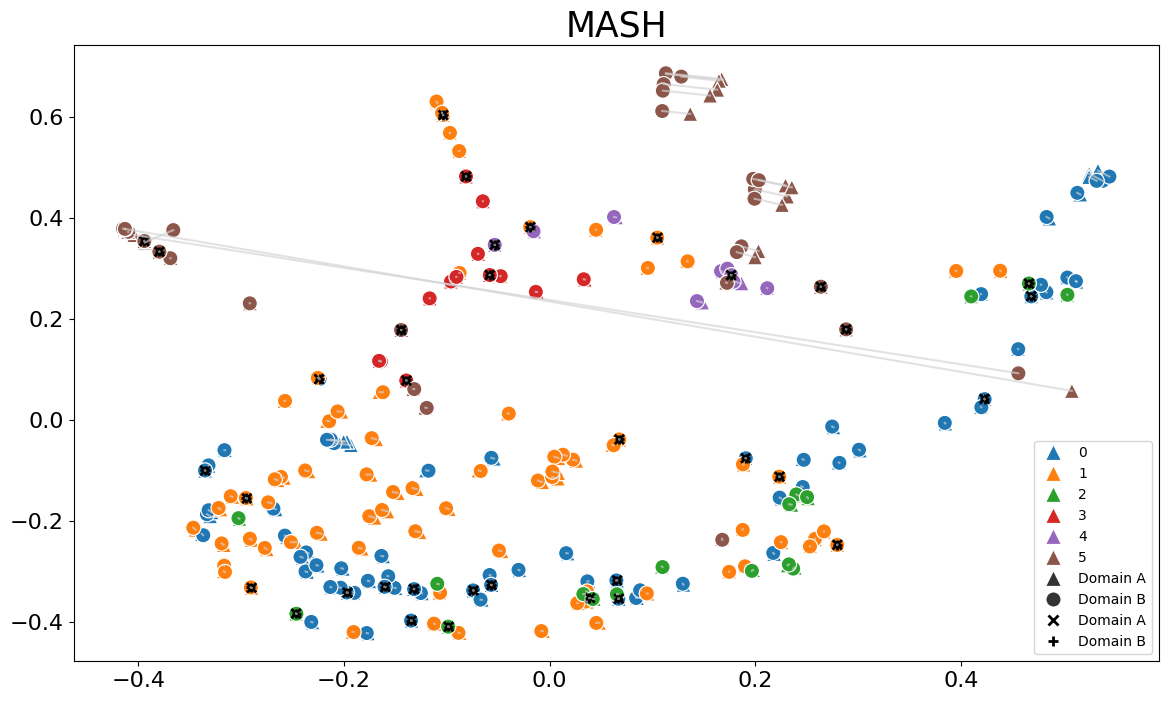

In [67]:
glass_mashed.plot_emb(labels = glass_labels)

In [68]:
#That's it for the demo! Try adding the following line:
#glass_mashed.optimize_by_creating_connections(epochs= 3, threshold = "auto", connection_limit=None, hold_out_anchors=glass_anchors[-10:])